In [18]:
from model import ConvNeuralNet
from dataloading import ShapesDataset
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [19]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
dataset_name = 'Circ_WonB'

image_count = 4

csv_path = '../data/%s/%s_labels.csv'%(dataset_name, dataset_name)
dataset = ShapesDataset(csv_file = csv_path, nrows=image_count, device=device)
loader = DataLoader(dataset = dataset, batch_size=1, shuffle = False)

In [20]:
model_name = 'Circ_WonB'
model_num = 'model2'

model = torch.load('models/%s_%s.pth'%(model_name, model_num))

In [21]:
images = []
activations = []

layer = 5

with torch.no_grad():
    for i, (img, label) in enumerate(loader):
        images.append(torch.squeeze(img))
        img = img.to(device)
        label = label.to(device)
        out = torch.squeeze(model(img), 1)
    #     print(img.shape, '|', label.shape, '|', out.shape)
        act = model.activation(img, layer)
    #     print(act.shape)
        act = torch.squeeze(act, 0)
        activations.append(act.cpu())
    #     print(act[0].shape)

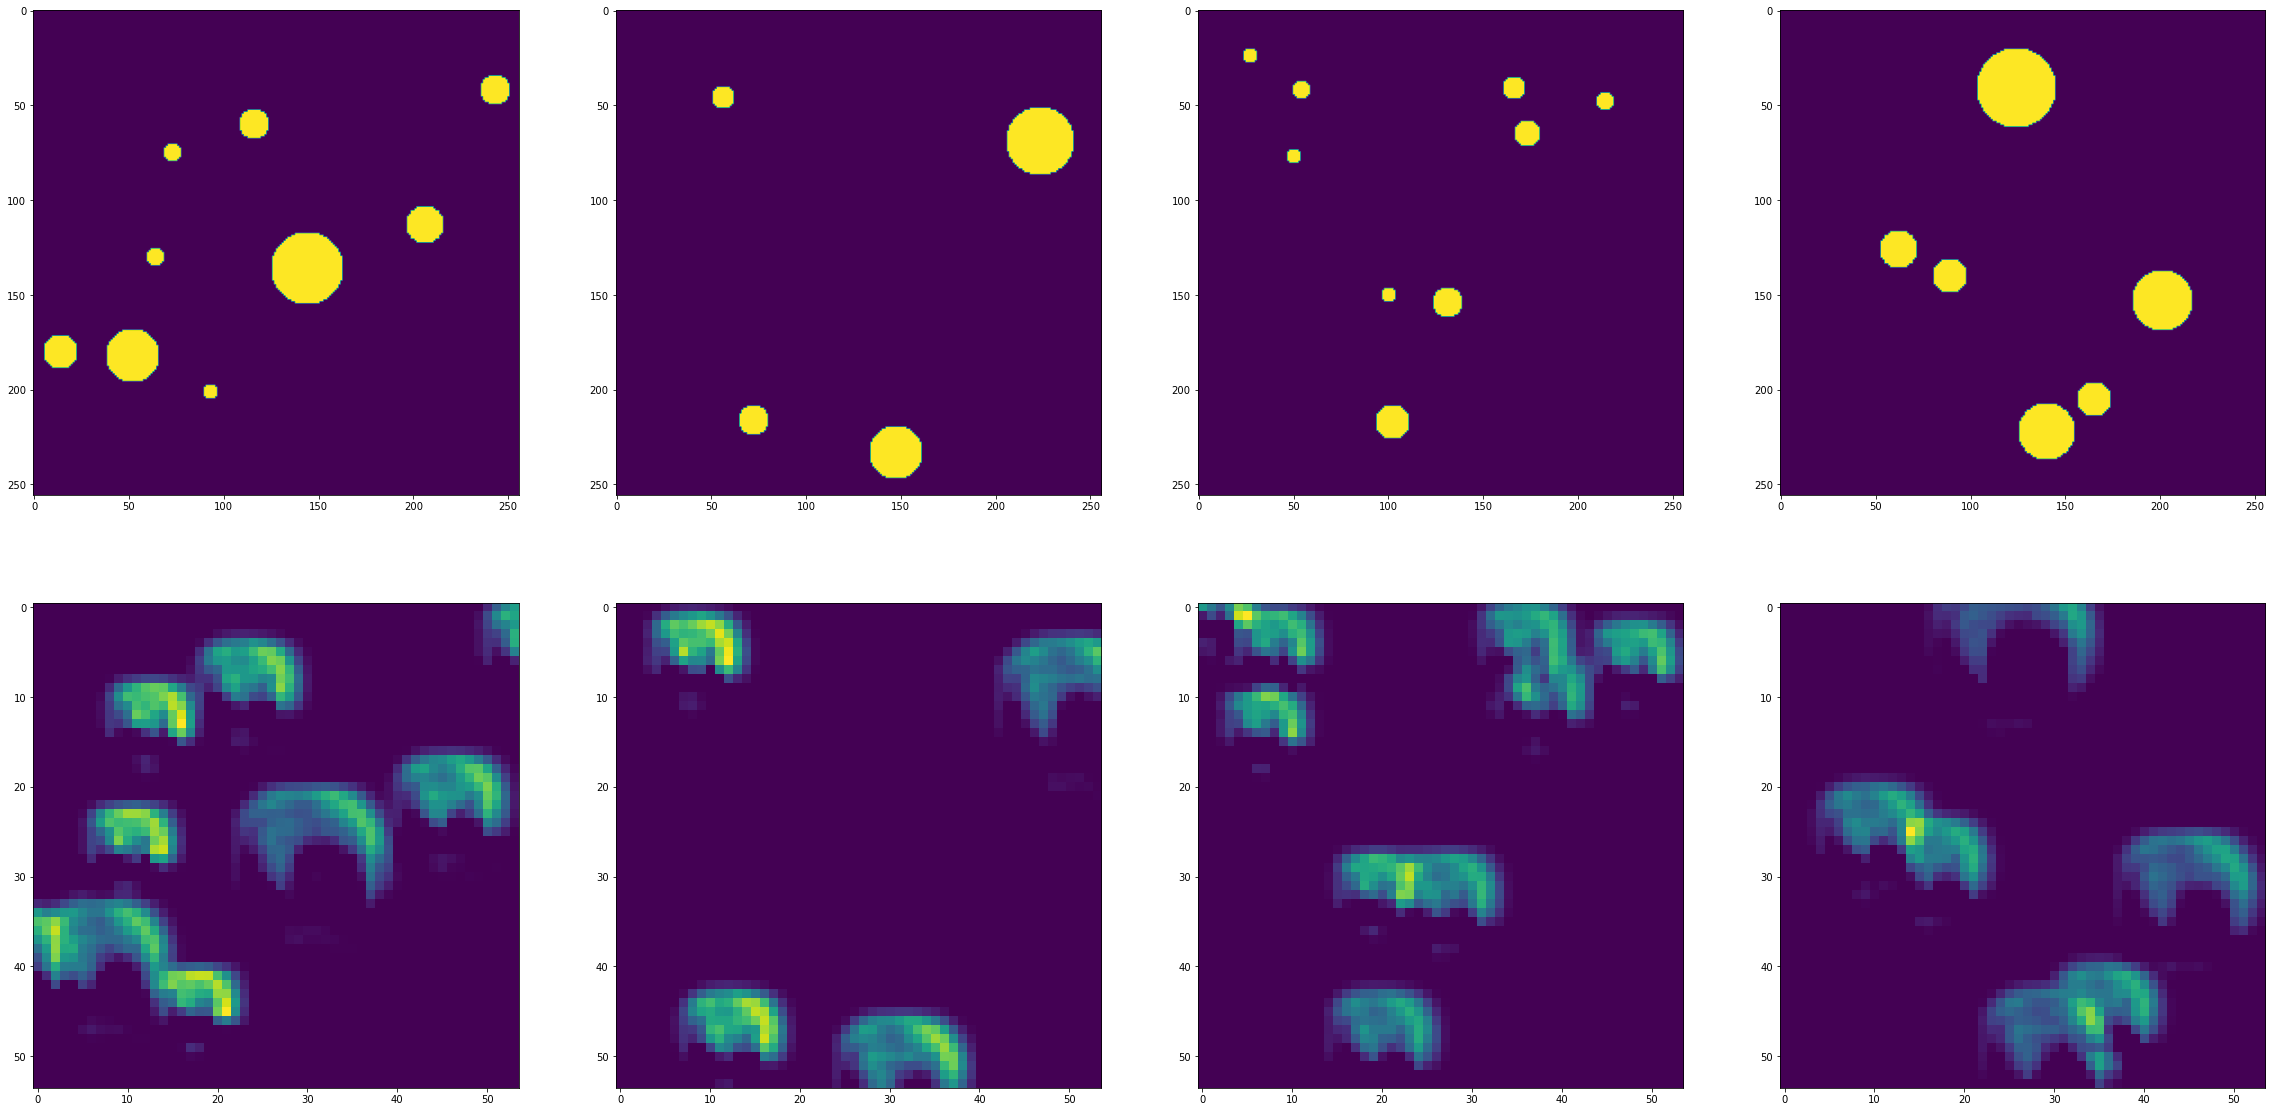

In [22]:
# plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(2, image_count, figsize=(40, 20))

channel = 16

channel_acts = []

for act in activations:
    channel_acts.append(act[channel])
    
for i in range(image_count):
    ax[0, i].imshow(images[i])
    ax[1, i].imshow(channel_acts[i])